***

# Plant Growth Data Analysis with t-test and ANOVA

***

![Plant Growth](https://upload.wikimedia.org/wikipedia/commons/thumb/e/e6/Echinochloa_crusgalli_habit3_-_Flickr_-_Macleay_Grass_Man.jpg/800px-Echinochloa_crusgalli_habit3_-_Flickr_-_Macleay_Grass_Man.jpg)

## Description:

This project involves performing a statistical analysis of plant growth data using Python. The dataset, [PlantGrowth](https://vincentarelbundock.github.io/Rdatasets/), provides information on the weight of plants grown under different conditions (a control group and two experimental groups). The main objectives of the project are:

1. Describe the dataset and conduct a preliminary analysis.
2. Explain the concept of a t-test, its assumptions.
3. Perform a t-test to determine if there are statistically significant differences in plant weight between the two experimental groups (`trt1` and `trt2`).
4. Explain the ANOVA method, its advantages, and its use cases.
5. Perform a one-way Analysis of Variance (ANOVA) to test if there are differences in the mean plant weights across the three groups (`ctrl`, `trt1`, and `trt2`).
6. Discuss why ANOVA is preferable to conducting multiple t-tests when comparing more than two groups.


***

## Description of the dataset 

[Results from an Experiment on Plant Growth(Description)](https://vincentarelbundock.github.io/Rdatasets/doc/datasets/PlantGrowth.html)

> Results from an experiment to compare yields (as measured by dried weight of plants) obtained under a control and two different treatment conditions.
> 
> **Usage**  
> `PlantGrowth`  

> **Format**  
> A data frame of 30 cases on 2 variables:  
> - `[, 1] weight` - Numeric  
> - `[, 2] group` - Factor 
>  
> The levels of the group are: `ctrl`, `trt1`, and `trt2`.  

> **Source**  
> Dobson, A. J. (1983). *An Introduction to Statistical Modelling*. London: Chapman and Hall.



***

## Import libraries 

- [Pandas](https://pandas.pydata.org/docs/)
- [Matplotlib](https://matplotlib.org/stable/contents.html)
- [Statistical functions (scipy.stats)](https://docs.scipy.org/doc/scipy/reference/stats.html)
- [Seaborn: statistical data visualization](https://seaborn.pydata.org/#seaborn-statistical-data-visualization)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, levene, shapiro, f_oneway, tukey_hsd

## Load data 

In [2]:
# Load the dataset into a DataFrame.
plant_df = pd.read_csv("./data/PlantGrowth.csv")

# Show.
plant_df

,rownames,weight,group
0,1,4.17,ctrl
1,2,5.58,ctrl
2,3,5.18,ctrl
3,4,6.11,ctrl
4,5,4.50,ctrl
5,6,4.61,ctrl
6,7,5.17,ctrl
7,8,4.53,ctrl
8,9,5.33,ctrl
9,10,5.14,ctrl


## Display summary statistic 

In [3]:
# Display statistics of 'weight' grouped by 'group'.
plant_df.groupby('group')['weight'].describe()

,count,mean,std,min,25%,50%,75%,max
group,,,,,,,,
ctrl,10.0,5.032,0.583091,4.17,4.5500,5.155,5.2925,6.11
trt1,10.0,4.661,0.793676,3.59,4.2075,4.550,4.8700,6.03
trt2,10.0,5.526,0.442573,4.92,5.2675,5.435,5.7350,6.31


### Brief summary of the descriptive statistics for the `weight` variable grouped by treatment groups (`ctrl`, `trt1`, `trt2`):

**`trt2`** has the highest mean weight, followed by the **`ctrl`** group, with **`trt1`** having the lowest mean weight.  
**`trt1`** shows the largest variability in weight, as indicated by its higher standard deviation (0.79), whereas **`trt2`** shows the least variability with a standard deviation of 0.44.  
The spread of weights (range and interquartile range) is narrower in **`trt2`**, suggesting more consistent results within this group.  
These insights provide a good starting point for further statistical analysis, such as ANOVA, to test for significant differences between the groups.


***

## Visualize the data

### Boxplot of `weight` grouped by treatment

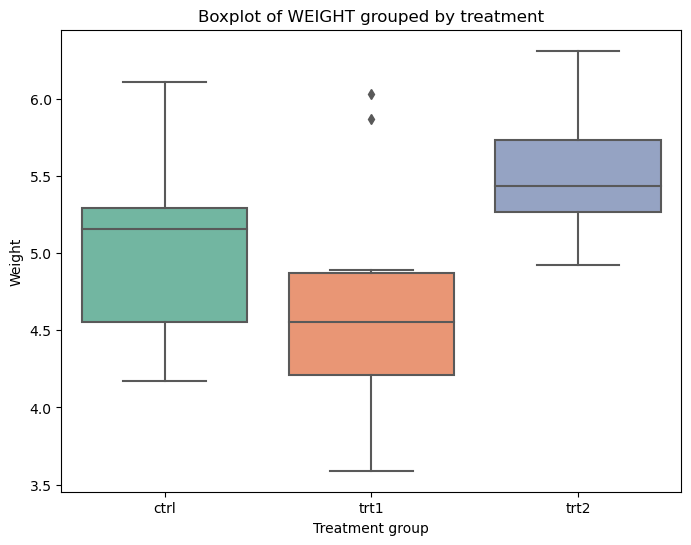

In [4]:
# Create a figure and axes.
fig, ax = plt.subplots(figsize=(8, 6)) 

# Generate a boxplot of 'weight' by 'group' using Seaborn.
sns.boxplot(x='group', y='weight', data=plant_df, palette='Set2', ax=ax)

# Add title and axis labels.
ax.set_title('Boxplot of WEIGHT grouped by treatment')
ax.set_xlabel('Treatment group')
ax.set_ylabel('Weight');

### Strip plot to show the distribution of `weight`

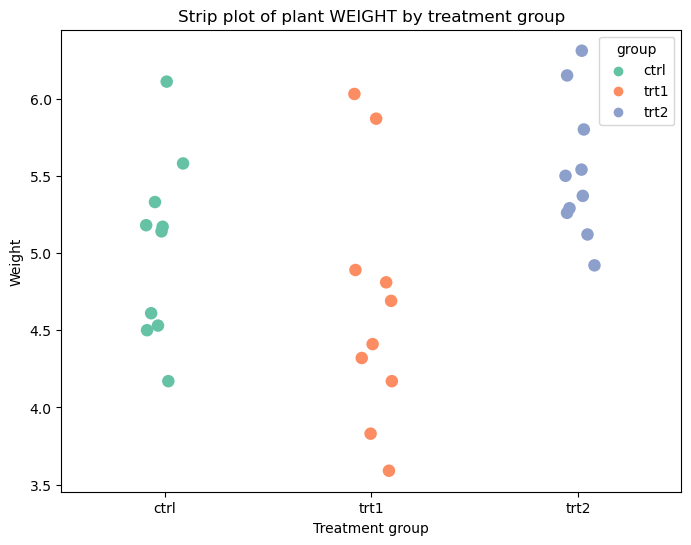

In [5]:
# Create a figure and axes.
fig, ax = plt.subplots(figsize=(8, 6))

# Generate a strip plot of 'weight' by 'group'.
sns.stripplot(data=plant_df, x='group', y='weight', jitter=True, ax=ax, hue='group', palette='Set2', size=9)

# Add title and axis labels.
ax.set_title('Strip plot of plant WEIGHT by treatment group')
ax.set_xlabel('Treatment group')
ax.set_ylabel('Weight');

### Importance of visualizing data distributions

Creating graphical representations, like boxplots or strip plots, helps us:

1. **Understand Variability**: Shows the range and spread of values within each group.  
2. **Spot Outliers**: Highlights unusual values, such as the two outliers in the `trt1` group, which may affect results.  
3. **Check Distribution**: Gives a quick sense of the shape of the data, like whether it’s symmetric or skewed.  
4. **Validate Assumptions**: Helps assess if the data meets conditions for statistical tests, like normality and equal variances.

These visualizations guide us in identifying potential problems and refining our analysis.


***

## The t-test and its assumptions


The definition of **t-test** (**Student's t-test**) from [WikipediA](https://en.wikipedia.org/wiki/Student%27s_t-test): 

> Student's t-test is a statistical test used to test whether the difference between the response of two groups is statistically significant or not. It is any statistical hypothesis test in which the test statistic follows a Student's t-distribution under the null hypothesis. 

There are different types of t-tests depending on the nature of the data and the relationship between the groups being compared.

1. **Independent Samples T-Test**: Compares means between two independent groups (e.g., `trt1` and `trt2` in this dataset).
2. **Paired Samples T-Test**: Compares means from the same group at different times (e.g., pre-test and post-test).
3. **One-Sample T-Test**: Compares a sample mean to a known value.

Applying **Independent Samples T-Test** the following [assumptions from Wikipedia](https://en.wikipedia.org/wiki/Student%27s_t-test#Assumptions) should be met:

1. **Normality**: The data should follow a normal distribution.
2. **Independence**: The observations in each group must be independent.
3. **Homogeneity of Variance**: The variances in the two groups should be approximately equal.

From the [Laerd Statistics: "Independent t-test using SPSS Statistics"](https://statistics.laerd.com/spss-tutorials/independent-t-test-using-spss-statistics.php) the assumptions are wider: 

1. **Continuous Dependent Variable**: The dependent variable (e.g., `weight`) must be measured on a continuous scale (interval or ratio level).
2. **Categorical Independent Variable**: The independent variable should have two independent groups (e.g., `trt1` and `trt2` in this dataset).
3. **Independence of Observations**: Observations must be independent, meaning no overlap exists between the groups or their participants.
4. **No Significant Outliers**: The data should not have extreme values that could distort the results. Outliers can be identified and addressed before analysis.
5. **Normality**: The dependent variable should be approximately normally distributed for each group. This can be tested using methods such as the [Shapiro-Wilk test](https://en.wikipedia.org/wiki/Shapiro%E2%80%93Wilk_test).
6. **Homogeneity of Variance**: The variance of the dependent variable should be similar across the two groups. This can be tested using [Levene's test](https://en.wikipedia.org/wiki/Levene%27s_test).



***

## Performing a t-test between `trt1` and `trt2`

We will conduct an independent samples t-test to determine if there is a statistically significant difference in mean weight between `trt1` and `trt2`.

Meeting the assumptions:

1. The dependent variable weight is continuous, as it represents the weight of plants, which can be measured on a ratio scale.

2. The independent variable group has two categories (`trt1` and `trt2`).

3. It seems to meet third assumption, as the observations from each treatment group (`trt1`, `trt2`) are independent of each other. 

4. Outliers can be checked using boxplots or other methods. Given the dataset's small size, it's important to visually inspect for outliers, which may distort the results.

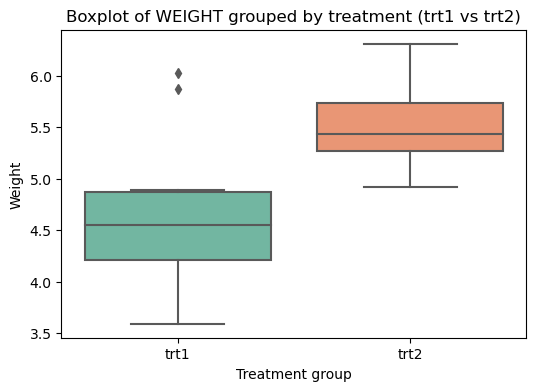

In [6]:
# Filter the data for two groups: trt1 and trt2.
two_groups_df = plant_df[plant_df['group'].isin(['trt1', 'trt2'])]

# Create a boxplot for the two groups.
fig, ax = plt.subplots(figsize=(6, 4)) 
sns.boxplot(x='group', y='weight', data=two_groups_df, palette='Set2', ax=ax)

# Add title and axis labels.
ax.set_title('Boxplot of WEIGHT grouped by treatment (trt1 vs trt2)')
ax.set_xlabel('Treatment group')
ax.set_ylabel('Weight');

There are outliers in the `trt1` treatment group. It looks like they should be saved to see how they affect the result. 

In [7]:
# Extract weights for the two groups.
trt1 = plant_df[plant_df['group'] == 'trt1']['weight']
trt2 = plant_df[plant_df['group'] == 'trt2']['weight']

5. The results of the [**Shapiro-Wilk test**](https://en.wikipedia.org/wiki/Shapiro%E2%80%93Wilk_test) for normality are as follows:
trt1: p-value = 0.452 (no significant departure from normality)
trt2: p-value = 0.564 (no significant departure from normality)
Since the p-values are all greater than 0.05, we fail to reject the null hypothesis of normality, indicating that the data is approximately normally distributed for our two groups.

In [8]:
# Test for normality using Shapiro-Wilk test.
shapiro_trt1 = shapiro(trt1)
shapiro_trt2 = shapiro(trt2)

# Show the results.
print(f"Shapiro-Wilk test for trt1: {shapiro_trt1}")
print(f"Shapiro-Wilk test for trt2: {shapiro_trt2}")

Shapiro-Wilk test for trt1: ShapiroResult(statistic=0.9304108619689941, pvalue=0.451945960521698)
Shapiro-Wilk test for trt2: ShapiroResult(statistic=0.941005289554596, pvalue=0.5642533898353577)


6. The results of [**Levene's test**](https://en.wikipedia.org/wiki/Levene%27s_test) for homogeneity of variance:
p-value = 0.164 (no significant difference in variances across groups)
Since the p-value is greater than 0.05, we fail to reject the null hypothesis of equal variances, meaning the assumption of homogeneity of variance is satisfied.

In [9]:
# Test for equality of variances using Levene's test.
levene_test = levene(trt1, trt2)

# Show the results.
print(f"Levene's test for equality of variances: {levene_test}")

Levene's test for equality of variances: LeveneResult(statistic=2.104177792800407, pvalue=0.1641008315679023)


Finally, perform an independent two-sample t-test using [`scipy.stats.ttest_ind`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html) from the `scipy.stats` library, to compare the means of `trt1` and `trt2`. The test determines whether the difference in means between the two groups is statistically significant.

In [10]:
# Perform the t-test.
t_test = ttest_ind(trt1, trt2)

# Show the results. 
print(f"T-Test results: {t_test}")

T-Test results: TtestResult(statistic=-3.0100985421243616, pvalue=0.0075184261182198574, df=18.0)


### **T-test results analysis**

- **Test Statistic (statistic):**  
  The t-statistic is **-3.010**, indicating the magnitude and direction of the difference between the group means relative to the variability within the groups.

- **P-Value (pvalue):**  
  The p-value is **0.0075**, which is less than the standard significance threshold of **0.05**. This provides strong evidence to reject the null hypothesis ($H_0$).

- **Degrees of Freedom (df):**  
  The degrees of freedom are **18.0**, calculated based on the sample sizes of the two groups.

The results of the t-test indicate a **statistically significant difference** in the means of `trt1` and `trt2`. Since the p-value is less than 0.05, we reject the null hypothesis ($H_0$) and conclude that the two treatments have significantly different effects on plant weight.


***

## ANOVA method, its advantages, and its use cases

We analyse the [PlantGrowth](https://vincentarelbundock.github.io/Rdatasets/) dataset to compare the mean plant weights across three treatment groups: `ctrl` (control), `trt1` (treatment 1), and `trt2` (treatment 2). To achieve this, we apply Analysis of Variance (ANOVA).

[ANOVA](https://en.wikipedia.org/wiki/Analysis_of_variance) is a statistical method used to test whether the means of multiple groups are significantly different from each other. It evaluates the null hypothesis ($H_0$), which states that all group means are equal.

ANOVA works by comparing two sources of variability in the data:

 - **Between-Group Variance**: Differences between the means of different groups.
 - **Within-Group Variance**: Variability within each individual group.
If the between-group variance is significantly greater than the within-group variance, it suggests that at least one group mean is different, leading to the rejection of the null hypothesis.

**Types of ANOVA**:
 - **One-Way ANOVA**: Tests the effect of a single independent variable (factor) on a dependent variable.
 - **Two-Way ANOVA** (or more): Analyses the effects of two or more factors simultaneously.
 - [**others**](https://www.statisticssolutions.com/the-various-forms-of-anova/).

**ANOVA Output**:
 - **F-statistic**: The ratio of between-group variance to within-group variance.
 - **p-value**: If $𝑝 < 0.05$, the null hypothesis is rejected, indicating that at least one group's mean is different.

We apply [**One-Way ANOVA**](https://en.wikipedia.org/wiki/One-way_analysis_of_variance), as we are testing the effect of a single independent variable (`group`) on the dependent variable (`weight`).



***

## Performing ANOVA on `ctrl`, `trt1`, and `trt2`


We will perform a One-Way ANOVA to test whether there is a significant difference in mean weight across the three treatment groups.

In [11]:
# Extract weights for the three groups.
ctrl = plant_df[plant_df['group'] == 'ctrl']['weight']
trt1 = plant_df[plant_df['group'] == 'trt1']['weight']
trt2 = plant_df[plant_df['group'] == 'trt2']['weight']

Meeting the assumptions of One-Way ANOVA (resourse for assumptions - [One-way ANOVA in SPSS Statistics](https://statistics.laerd.com/spss-tutorials/one-way-anova-using-spss-statistics.php)): 
1. **Continuous Dependent Variable**: The dependent variable (`weight`) is measured on a continuous scale.
2. **Categorical Independent Variable**: The independent variable (`group`) has three independent groups (`ctrl`, `trt1`, `trt2`).
3. **Independence of Observations**: Observations within and across groups are independent. 
4. **No Significant Outliers**: Outliers were detected in `trt1` (e.g., two values). Decided to keep them to look how they affect the results. 

5. **Normality**:

All three groups (`ctrl`, `trt1`, and `trt2`) have p-values greater than **0.05** in the [**Shapiro-Wilk test**](https://en.wikipedia.org/wiki/Shapiro%E2%80%93Wilk_test). This means that the assumption of normality is met for all groups, and it is appropriate to proceed with a one-way ANOVA.

In [12]:
# Perform Shapiro-Wilk test for each group.
shapiro_ctrl = shapiro(ctrl)
shapiro_trt1 = shapiro(trt1)
shapiro_trt2 = shapiro(trt2)

# Print the results.
print(f"Shapiro-Wilk Test for 'ctrl': Statistic={shapiro_ctrl.statistic}, p-value={shapiro_ctrl.pvalue}")
print(f"Shapiro-Wilk Test for 'trt1': Statistic={shapiro_trt1.statistic}, p-value={shapiro_trt1.pvalue}")
print(f"Shapiro-Wilk Test for 'trt2': Statistic={shapiro_trt2.statistic}, p-value={shapiro_trt2.pvalue}")

Shapiro-Wilk Test for 'ctrl': Statistic=0.9566815495491028, p-value=0.7474744915962219
Shapiro-Wilk Test for 'trt1': Statistic=0.9304108619689941, p-value=0.451945960521698
Shapiro-Wilk Test for 'trt2': Statistic=0.941005289554596, p-value=0.5642533898353577


6. **Homogeneity of Variances**:

The results of [**Levene's test**](https://en.wikipedia.org/wiki/Levene%27s_test): p-value = 0.341 (no significant difference in variances across groups).
Since the p-value is greater than 0.05, we fail to reject the null hypothesis of equal variances, meaning the assumption of homogeneity of variance is satisfied.

In [13]:
# Perform Levene's test.
levene_result = levene(ctrl, trt1, trt2)

# Show the results.
print(f"Levene's Test: Statistic={levene_result.statistic}, p-value={levene_result.pvalue}")

Levene's Test: Statistic=1.1191856948703909, p-value=0.3412266241254737


Finally, perform One-Way ANOVA using [`scipy.stats.f_oneway`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html) from the `scipy.stats` library, to compare the means of `ctrl`, `trt1` and `trt2`. The test determines whether the difference in means between the three groups is statistically significant.

In [14]:
# Perform the ANOVA test.
anova_result = f_oneway(ctrl, trt1, trt2)

# Show the results. 
print(f"ANOVA results: {anova_result}")

ANOVA results: F_onewayResult(statistic=4.846087862380136, pvalue=0.0159099583256229)


### **One-Way ANOVA results analysis**

- **Statistic**:
  The F-statistic is **4.846**, which measures the ratio of variance between the groups to variance within the groups. A higher value suggests more variability between groups relative to within groups.

- **P-Value**:
 The p-value is **0.01591**, which is less than the standard significance level ($α=0.05$).

Since $p<0.05$, we reject the null hypothesis ($H_0$) that the means of the three groups are equal. There is a **statistically significant difference** in mean weight across the three treatment groups (`ctrl`, `trt1`, and `trt2`).

Since the results of the One-Way ANOVA indicate a statistically significant difference ($p < 0.05$) in mean weight across the three treatment groups (`ctrl`, `trt1`, and `trt2`), we need to determine which specific groups differ from each other.
So, 
1. **Perform Post-Hoc Analysis**:
   - To identify pairwise differences between the groups, we will use [**Tukey's Honest Significant Difference (HSD) test**](https://en.wikipedia.org/wiki/Tukey%27s_range_test).  
   - Tukey's HSD is well-suited for comparing all possible pairs of groups while controlling for [Type I error](https://en.wikipedia.org/wiki/Type_I_and_type_II_errors).

2. **Interpret Results**:
   - Tukey's HSD will reveal which group pairs (e.g., `ctrl` vs. `trt1`, `trt1` vs. `trt2`) show statistically significant differences in their means.

In [15]:
# Tukey's HSD.
tukey_result = tukey_hsd(ctrl, trt1, trt2)

# Show the results
print(tukey_result)

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)      0.371     0.391    -0.320     1.062
 (0 - 2)     -0.494     0.198    -1.185     0.197
 (1 - 0)     -0.371     0.391    -1.062     0.320
 (1 - 2)     -0.865     0.012    -1.556    -0.174
 (2 - 0)      0.494     0.198    -0.197     1.185
 (2 - 1)      0.865     0.012     0.174     1.556



### **Overall summary**:

There is a **statistically significant difference** between the mean weights of `trt1` and `trt2`, with `trt2` showing higher mean weights.

There are **no statistically significant differences** between the other group pairs (`ctrl` vs. `trt1` or `ctrl` vs. `trt2`).

***

## Why choose ANOVA over multiple t-tests 

**References for this part**
 - [One-way ANOVA (cont...)](https://statistics.laerd.com/statistical-guides/one-way-anova-statistical-guide-2.php)
 - [Visualizing the danger of multiple t-test comparisons](https://mattsosna.com/T-tests-vs-ANOVA/)
 - [ANOVA vs t-Test: Definition & Working](https://www.voxco.com/blog/anova-vs-t-test-with-a-comparison-chart/)
 - [Difference between t-test and ANOVA](https://www.geeksforgeeks.org/difference-between-t-test-and-anova/?ref=gcse_outind)

The table that compares **t-test** and **ANOVA** based on various criteria, helping to understand their differences and use cases from this source [Difference between t-test and ANOVA](https://www.geeksforgeeks.org/difference-between-t-test-and-anova/?ref=gcse_outind).

| **Feature**               | **t-test**                                | **ANOVA**                                 |
|---------------------------|------------------------------------------|-------------------------------------------|
| **Purpose**               | Compares means between two groups        | Compares means across three or more groups |
| **Number of Groups**      | Two groups                               | Three or more groups                      |
| **Types**                 | Independent t-test, Paired t-test        | One-way ANOVA, Two-way ANOVA              |
| **Hypothesis Tested**     | Null hypothesis: No difference between the two group means | Null hypothesis: No difference between group means |
| **Assumptions**           | Normal distribution, equal variance      | Normal distribution, equal variance, independence of observations |
| **Dependent Variable**    | Continuous                               | Continuous                                |
| **Independent Variable**  | Categorical with two levels              | Categorical with three or more levels     |
| **Test Statistic**        | t-statistic                              | F-statistic                               |
| **Output**                | p-value, confidence intervals            | p-value, F-ratio                          |
| **Post-hoc Testing**      | Not required if significant              | Post-hoc tests (e.g., Tukey's HSD) are required to identify which groups differ |
| **Use Case**              | Comparing means between two groups       | Comparing means across multiple groups    |
| **Example**               | Testing the effectiveness of two medications | Testing the effectiveness of multiple teaching methods |


Based on the sources above, we can summarize the reasons for preferring **ANOVA** over multiple **t-tests** as follows:

1. **Control of Type I Error**: 
   - When performing multiple t-tests, the probability of committing a Type I error (incorrectly rejecting a true null hypothesis) increases as the number of comparisons grows.  Each t-test carries a risk of a false positive, and the more t-tests you perform, the higher the overall risk of finding a significant result when there is none. ANOVA, in contrast, evaluates all group comparisons simultaneously in a single analysis, controlling for Type I error across all comparisons.

2. **Efficiency**: 
   - Conducting multiple t-tests can be time-consuming and inefficient, especially when comparing more than two groups. For example, when comparing three groups, you'd need to perform three t-tests (`ctrl` vs `trt1`, `ctrl` vs `trt2`, `trt1` vs `trt2`). If there were more groups, this number increases exponentially. ANOVA, however, condenses these comparisons into a single test, making it much more efficient.

3. **Holistic Analysis of Group Differences**: 
   - While t-tests only compare two groups at a time, ANOVA considers the variability within and between all groups. This means that ANOVA can determine whether there is any overall significant difference among the groups, rather than just focusing on pairwise comparisons. By testing the null hypothesis that all group means are equal in a single step, ANOVA provides a more comprehensive view of the data.

4. **Avoiding Redundancy**: 
   - Multiple t-tests on the same data can lead to redundancy and inconsistencies in results. For instance, one pair of groups may show a significant difference, while another might not. This piecemeal approach doesn't offer a unified, overall understanding of group differences. ANOVA handles the comparison of all groups at once, avoiding these inconsistencies.

5. **Better Statistical Power**: 
   - ANOVA generally provides better statistical power for detecting significant differences between groups than multiple t-tests. This is because it uses information from all groups simultaneously, increasing the precision of the comparison.

### Conclusion:
In summary, **ANOVA** is a more robust, efficient, and statistically sound method when comparing more than two groups. It reduces the risk of Type I error, provides a holistic analysis, and increases statistical power. For these reasons, ANOVA is preferred over multiple t-tests in studies involving multiple groups.

***

# END